In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import RegularPolygon
from matplotlib.collections import PolyCollection
import cdsapi
import xarray as xr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cdsapi
import xarray as xr

In [2]:
# Step 1: Retrieve ERA5 Data
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': '2m_temperature',
        'year': '2023',
        'month': '10',
        'day': '01',
        'time': [
            '00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'
        ],
        'area': [90, -180, -90, 180],  # North, West, South, East
    },
    'temperature_data.nc')

2024-10-30 22:26:16,211 WARNING [2024-10-10T00:00:00] The final validated ERA5 differs from ERA5T in July 2024 - please refer to our
[Forum announcement](https://forum.ecmwf.int/t/final-validated-era5-product-to-differ-from-era5t-in-july-2024/6685)
for details and watch it for further updates on this.
2024-10-30 22:26:16,211 WARNING [2024-10-30T22:26:16.229265] You are using a deprecated API endpoint. If you are using cdsapi, please upgrade to the latest version.
2024-10-30 22:26:16,212 INFO Request ID is 2aef4d79-75bb-4bbf-8902-ac5788bb7b46
2024-10-30 22:26:16,277 INFO status has been updated to accepted
2024-10-30 22:26:20,197 INFO status has been updated to running
2024-10-30 22:26:36,597 INFO status has been updated to successful


17949693c6e64668b236f5893278fa29.nc:   0%|          | 0.00/34.1M [00:00<?, ?B/s]

'temperature_data.nc'

In [3]:
# Step 2: Load temperature data
data = xr.open_dataset('temperature_data.nc')
temp_data = data['t2m'] - 273.15  # Convert from Kelvin to Celsius

c:\Users\Charlie\Documents\GitHub\mapping-challenge\.venv\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
# Step 3: Set up hexagonal grid
num_hex_x = 20
num_hex_y = 10

def hexbin_grid(lons, lats, temperature):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.COASTLINE)
    ax.set_title('World Temperature Hexbin Map')

    hex_centers = []
    for x in range(num_hex_x):
        for y in range(num_hex_y):
            lon = -180 + (x + 0.5 * (y % 2)) * (360 / num_hex_x)
            lat = -90 + y * (180 / num_hex_y)
            hex_centers.append((lon, lat))

    for (lon, lat) in hex_centers:
        temperature_value = temperature.sel(longitude=lon, latitude=lat, method='nearest')
        hex = RegularPolygon((lon, lat), numVertices=6, radius=10,
                             edgecolor='k', facecolor=plt.cm.viridis(temperature_value))
        ax.add_patch(hex)

    plt.show()

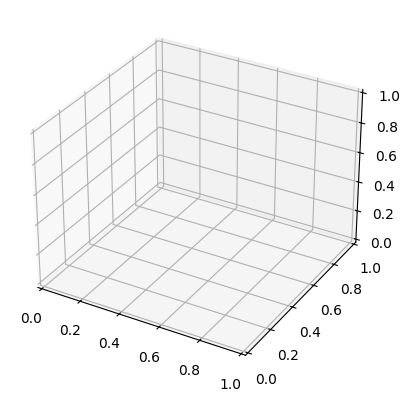

In [5]:
# Step 4: Animation setup
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hex_centers = []
x_offset = np.sqrt(3) / 2
for x in range(num_hex_x):
    for y in range(num_hex_y):
        center_x = x * x_offset
        center_y = y + 0.5 * (x % 2)
        hex_centers.append((center_x, center_y))




In [6]:
# Step 5: Function to update frame
def update(frame):
    ax.clear()
    ax.set_title(f'Hour: {frame:02d}:00')
    
    temp_frame = temp_data.isel(time=frame)
    
    for (x, y) in hex_centers:
        temperature_value = temp_frame.sel(longitude=x, latitude=y, method='nearest')
        height = temperature_value.values / 10.0  # Scale down for visualization purposes
        hex = RegularPolygon((x, y), numVertices=6, radius=0.5, facecolor=plt.cm.viridis(height))
        ax.add_patch(hex)


In [7]:

# Step 6: Create animation
ani = animation.FuncAnimation(fig, update, frames=24, interval=500)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import RegularPolygon
import cdsapi
import xarray as xr

# Step 1: Retrieve ERA5 Data
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': '2m_temperature',
        'year': '2023',
        'month': '10',
        'day': '01',
        'time': [
            '00:00', '01:00', '02:00', '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00', '21:00', '22:00', '23:00'
        ],
        'area': [90, -180, -90, 180],  # North, West, South, East
    },
    'temperature_data.nc')

In [ ]:
# Step 2: Load temperature data
data = xr.open_dataset('temperature_data.nc')
temp_data = data['t2m'] - 273.15  # Convert from Kelvin to Celsius

temp_data = temp_data.rename({"valid_time":"time"})

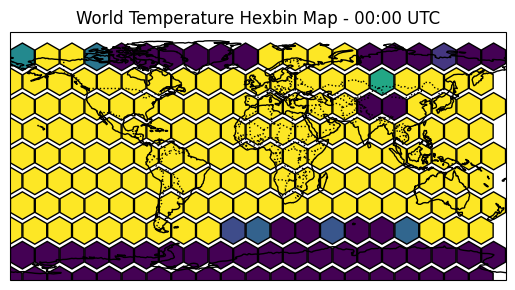

In [ ]:


# Step 3: Set up hexagonal grid and plot a single frame
num_hex_x = 20
num_hex_y = 10

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.set_title('World Temperature Hexbin Map - 00:00 UTC')

hex_centers = []
for x in range(num_hex_x):
    for y in range(num_hex_y):
        lon = -180 + (x + 0.5 * (y % 2)) * (360 / num_hex_x)
        lat = -90 + y * (180 / num_hex_y)
        hex_centers.append((lon, lat))

for (lon, lat) in hex_centers:
    temperature_value = temp_data.isel(time=0).sel(longitude=lon, latitude=lat, method='nearest')
    hex = RegularPolygon((lon, lat), numVertices=6, radius=10,
                         edgecolor='k', facecolor=plt.cm.viridis(temperature_value))
    ax.add_patch(hex)

plt.show()


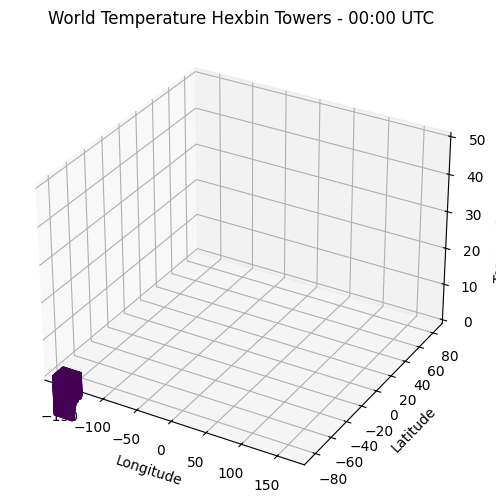

In [16]:
# Step 3: Set up hexagonal grid and plot a single frame as 3D towers
num_hex_x = 20
num_hex_y = 10

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('World Temperature Hexbin Towers - 00:00 UTC')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Temperature (°C)')

hex_centers = []
x_offset = np.sqrt(3) / 2
hex_radius = 8  # Reduced radius to remove spaces between hexagons

for x in range(num_hex_x):
    for y in range(num_hex_y):
        lon = -180 + x * (2 * hex_radius * np.cos(np.pi / 6)) / 10
        lat = -90 + y * (1.5 * hex_radius) / 10
        hex_centers.append((lon, lat))

for (lon, lat) in hex_centers:
    temperature_value = temp_data.isel(time=0).sel(longitude=lon, latitude=lat, method='nearest').values
    height = temperature_value / 5.0  # Scale down the temperature for visualization

    # Create vertices for the 3D hexagon tower
    angle_offset = np.pi / 6
    hexagon_vertices = []
    for i in range(6):
        angle = angle_offset + i * np.pi / 3
        x = lon + hex_radius * np.cos(angle) / 10  # Scale radius for better fit on 3D
        y = lat + hex_radius * np.sin(angle) / 10
        hexagon_vertices.append((x, y))

    # Draw bottom face
    bottom_verts = [(x, y, 0) for (x, y) in hexagon_vertices]
    verts = [bottom_verts]
    ax.add_collection3d(Poly3DCollection(verts, color=plt.cm.viridis(temperature_value), alpha=0.6))

    # Draw sides of the hexagon tower
    for i in range(6):
        x1, y1 = hexagon_vertices[i]
        x2, y2 = hexagon_vertices[(i + 1) % 6]
        verts = [[(x1, y1, 0), (x2, y2, 0), (x2, y2, height), (x1, y1, height)]]
        ax.add_collection3d(Poly3DCollection(verts, color=plt.cm.viridis(temperature_value), alpha=0.6))

    # Draw top face
    top_verts = [(x, y, height) for (x, y) in hexagon_vertices]
    verts = [top_verts]
    ax.add_collection3d(Poly3DCollection(verts, color=plt.cm.viridis(temperature_value), alpha=0.6))

ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_zlim(0, 50)
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: '\\mnt\\data'

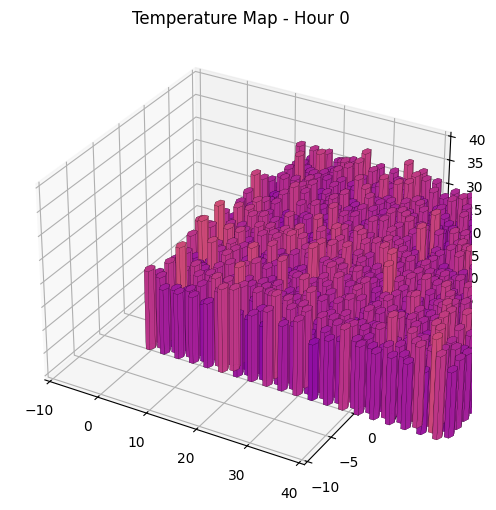

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import PillowWriter

# Constants for the hexagonal grid
num_rows = 20  # Number of rows of hexagons
num_cols = 40  # Number of columns of hexagons
hourly_steps = 24  # Number of hourly steps for animation
hex_radius = 1.0  # Radius of each hexagon

# Function to calculate temperature data for each hour
def generate_temperature_data(num_rows, num_cols, hourly_steps):
    # Generate synthetic data for illustration
    temperatures = np.zeros((hourly_steps, num_rows, num_cols))
    for hour in range(hourly_steps):
        base_temp = 15 + 10 * np.sin(2 * np.pi * hour / hourly_steps)  # Day-night cycle
        noise = np.random.normal(0, 2, (num_rows, num_cols))  # Random temperature variations
        temperatures[hour] = base_temp + noise  # Total temperature data for each hexagon
    return temperatures

# Generate synthetic temperature data for the hexagonal grid
temperature_data = generate_temperature_data(num_rows, num_cols, hourly_steps)

# Helper function to calculate hexagon center positions
def hexagon_center_positions(num_rows, num_cols, hex_radius):
    positions = []
    for i in range(num_rows):
        for j in range(num_cols):
            x = hex_radius * (3/2 * j)
            y = hex_radius * (np.sqrt(3) * (i + 0.5 * (j % 2)))
            positions.append((x, y))
    return np.array(positions)

# Get the center positions of hexagons
positions = hexagon_center_positions(num_rows, num_cols, hex_radius)

# Function to calculate vertices of a hexagon centered at (x_center, y_center)
def hexagon_vertices(x_center, y_center, radius, height=0):
    """Returns the vertices for a hexagon centered at (x_center, y_center) with a given radius."""
    angles = np.linspace(0, 2 * np.pi, 6, endpoint=False)
    vertices = [(x_center + radius * np.cos(angle), y_center + radius * np.sin(angle), height) for angle in angles]
    return vertices

# Function to plot a hexagonal prism (3D hexagonal tower)
def plot_hex_prism(ax, x_center, y_center, height, hex_radius, color):
    """Draws a hexagonal prism at (x_center, y_center) with a given height and color."""
    # Get vertices for the top and bottom faces
    bottom_vertices = hexagon_vertices(x_center, y_center, hex_radius, height=0)
    top_vertices = hexagon_vertices(x_center, y_center, hex_radius, height=height)
    
    # Create top, bottom, and side faces of the hexagonal prism
    verts = [top_vertices, bottom_vertices]
    for i in range(6):
        verts.append([bottom_vertices[i], bottom_vertices[(i + 1) % 6],
                      top_vertices[(i + 1) % 6], top_vertices[i]])
    
    # Add the prism to the plot
    ax.add_collection3d(Poly3DCollection(verts, color=color, edgecolor='k', linewidth=0.1, alpha=0.9))

# Initialize the 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Updated animation function to plot hexagonal prisms instead of bars
def plot_hex_prisms(hour):
    ax.cla()  # Clear previous frame

    # Set title for the current hour
    ax.set_title(f"Temperature Map - Hour {hour}")

    # Set axis limits for visibility
    ax.set_xlim(-10, num_cols * hex_radius)
    ax.set_ylim(-10, num_rows * hex_radius)
    ax.set_zlim(0, 40)

    # Plot each hexagon as a 3D prism
    for idx, (x, y) in enumerate(positions):
        i, j = divmod(idx, num_cols)
        height = temperature_data[hour, i, j]
        color = plt.cm.plasma(height / 40)  # Color based on temperature scale
        plot_hex_prism(ax, x, y, height, hex_radius * 0.8, color)

# Create a new animation with hexagonal prisms
ani_hex = FuncAnimation(fig, plot_hex_prisms, frames=hourly_steps, repeat=True)

# Save the updated animation as a gif
ani_hex.save('/mnt/data/temperature_map_hexagonal_animation.gif', writer=PillowWriter(fps=5))


In [22]:
era5_temperature_data

<xarray.DataArray 't2m' (time: 24, latitude: 721, longitude: 1440)>
array([[[  0.7848816 ,   0.7848816 ,   0.7848816 , ...,   0.7848816 ,
           0.7848816 ,   0.7848816 ],
        [  0.86886597,   0.86886597,   0.86886597, ...,   0.86691284,
           0.86691284,   0.86691284],
        [  0.97824097,   0.97824097,   0.9801941 , ...,   0.97628784,
           0.97628784,   0.97628784],
        ...,
        [-58.142838  , -58.140884  , -58.140884  , ..., -58.14479   ,
         -58.142838  , -58.142838  ],
        [-59.017838  , -59.017838  , -59.017838  , ..., -59.01979   ,
         -59.01979   , -59.01979   ],
        [-59.127213  , -59.127213  , -59.127213  , ..., -59.127213  ,
         -59.127213  , -59.127213  ]],

       [[  0.9460449 ,   0.9460449 ,   0.9460449 , ...,   0.9460449 ,
           0.9460449 ,   0.9460449 ],
        [  0.9616699 ,   0.9616699 ,   0.9616699 , ...,   0.9616699 ,
           0.9616699 ,   0.9616699 ],
        [  1.0456543 ,   1.0456543 ,   1.0456543 , ...,   1.0456543 ,
           1.0456543 ,   1.0456543 ],
...
        [-52.03357   , -52.035522  , -52.03943   , ..., -52.023804  ,
         -52.025757  , -52.029663  ],
        [-53.99646   , -53.998413  , -54.000366  , ..., -53.992554  ,
         -53.992554  , -53.994507  ],
        [-55.693726  , -55.693726  , -55.693726  , ..., -55.693726  ,
         -55.693726  , -55.693726  ]],

       [[  0.7468567 ,   0.7468567 ,   0.7468567 , ...,   0.7468567 ,
           0.7468567 ,   0.7468567 ],
        [  0.86209106,   0.86209106,   0.86209106, ...,   0.86013794,
           0.86013794,   0.86013794],
        [  0.86990356,   0.8718567 ,   0.8718567 , ...,   0.86795044,
           0.86795044,   0.86990356],
        ...,
        [-51.97191   , -51.96605   , -51.96019   , ..., -51.989487  ,
         -51.983627  , -51.977768  ],
        [-53.821518  , -53.81761   , -53.81566   , ..., -53.82933   ,
         -53.827377  , -53.82347   ],
        [-54.977768  , -54.977768  , -54.977768  , ..., -54.977768  ,
         -54.977768  , -54.977768  ]]], dtype=float32)
Coordinates:
    number     int64 ...
  * time       (time) datetime64[ns] 2022-07-01 ... 2022-07-01T23:00:00
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    expver     (time) <U4 ...

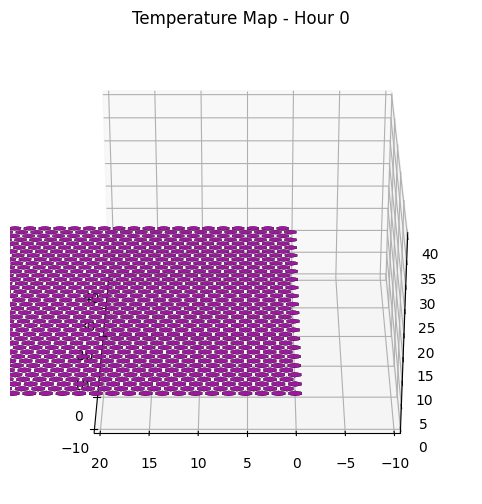

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import PillowWriter
import cdsapi
import xarray as xr

# Constants for the hexagonal grid
num_rows = 20  # Number of rows of hexagons
num_cols = 40  # Number of columns of hexagons
hourly_steps = 24  # Number of hourly steps for animation
hex_radius = 1.0  # Radius of each hexagon

# Fetch ERA5 temperature data using CDS API
def fetch_era5_temperature_data():
    c = cdsapi.Client()
    c.retrieve(
        'reanalysis-era5-single-levels',
        {
            'product_type': 'reanalysis',
            'variable': '2m_temperature',
            'year': '2022',
            'month': '07',
            'day': '01',
            'time': [
                '00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00', '07:00', '08:00', '09:00',
                '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
                '20:00', '21:00', '22:00', '23:00'
            ],
            'format': 'netcdf',
            'area': [70, -180, -70, 180],  # North, West, South, East (global coverage)
        },
        'era5_temperature_data.nc'
    )

# Load temperature data from the downloaded NetCDF file
def load_temperature_data(filepath='era5_temperature_data.nc'):
    ds = xr.open_dataset(filepath)
    temperature_data = ds['t2m'] - 273.15  # Convert from Kelvin to Celsius
    return temperature_data

# Generate temperature data for the hexagonal grid using ERA5
def generate_temperature_data_from_era5(temperature_data, num_rows, num_cols, hourly_steps):
    # Resample data to match the grid resolution
    temperatures = np.zeros((hourly_steps, num_rows, num_cols))
    lats = np.linspace(70, -70, num_rows)
    lons = np.linspace(-180, 180, num_cols)
    for hour in range(hourly_steps):
        temp_hourly = temperature_data.sel(valid_time=np.datetime64(f'2022-07-01T{str(hour).zfill(2)}:00:00')).interp(latitude=lats, longitude=lons)
        temperatures[hour] = temp_hourly.values
    return temperatures

# Fetch and load the ERA5 temperature data
# Uncomment the next line to fetch data (requires internet access)
# fetch_era5_temperature_data()

era5_temperature_data = load_temperature_data()
# Generate temperature data for the hexagonal grid
temperature_data = generate_temperature_data_from_era5(era5_temperature_data, num_rows, num_cols, hourly_steps)

# Normalize temperature data to have minimum height of zero
temp_min = np.min(temperature_data)
temperature_data = temperature_data - temp_min

# Helper function to calculate hexagon center positions
def hexagon_center_positions(num_rows, num_cols, hex_radius):
    positions = []
    for i in range(num_rows):
        for j in range(num_cols):
            x = hex_radius * (3/2 * j)
            y = hex_radius * (np.sqrt(3) * (i + 0.5 * (j % 2)))
            positions.append((x, y))
    return np.array(positions)

# Get the center positions of hexagons
positions = hexagon_center_positions(num_rows, num_cols, hex_radius)

# Function to calculate vertices of a hexagon centered at (x_center, y_center)
def hexagon_vertices(x_center, y_center, radius, height=0):
    """Returns the vertices for a hexagon centered at (x_center, y_center) with a given radius."""
    angles = np.linspace(0, 2 * np.pi, 6, endpoint=False)
    vertices = [(x_center + radius * np.cos(angle), y_center + radius * np.sin(angle), height) for angle in angles]
    return vertices

# Function to plot a hexagonal prism (3D hexagonal tower)
def plot_hex_prism(ax, x_center, y_center, height, hex_radius, color):
    """Draws a hexagonal prism at (x_center, y_center) with a given height and color."""
    # Get vertices for the top and bottom faces
    bottom_vertices = hexagon_vertices(x_center, y_center, hex_radius, height=0)
    top_vertices = hexagon_vertices(x_center, y_center, hex_radius, height=height)
    
    # Create top, bottom, and side faces of the hexagonal prism
    verts = [top_vertices, bottom_vertices]
    for i in range(6):
        verts.append([bottom_vertices[i], bottom_vertices[(i + 1) % 6],
                      top_vertices[(i + 1) % 6], top_vertices[i]])
    
    # Add the prism to the plot
    ax.add_collection3d(Poly3DCollection(verts, color=color, edgecolor='k', linewidth=0.1, alpha=0.9))

# Initialize the 3D figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=180)  # Set an initial view, can manually pan after creation
ax.mouse_init()  # Enable manual pan and zoom  # View from directly above looking south

# Updated animation function to plot hexagonal prisms instead of bars
def plot_hex_prisms(hour):
    ax.cla()  # Clear previous frame

    # Set title for the current hour
    ax.set_title(f"Temperature Map - Hour {hour}")

    # Set axis limits for visibility
    ax.set_xlim(-10, num_cols * hex_radius)
    ax.set_ylim(-10, num_rows * hex_radius)
    ax.set_zlim(0, 40)

    # Plot each hexagon as a 3D prism
    for idx, (x, y) in enumerate(positions):
        i, j = divmod(idx, num_cols)
        height = max(0, temperature_data[hour, i, j])
        color = plt.cm.plasma((height + 20) / 60)  # Color based on temperature scale
        plot_hex_prism(ax, x, y, height, hex_radius * 0.8, color)

# Create a new animation with hexagonal prisms
ani_hex = FuncAnimation(fig, plot_hex_prisms, frames=hourly_steps, repeat=True)

# Save the updated animation as a gif
# ani_hex.save('/mnt/data/temperature_map_hexagonal_animation.gif', writer=PillowWriter(fps=5))
